In [2]:
import scipy.io as sio
import numpy as np

# Load the .mat file using loadmat (works for older MAT formats)
data = sio.loadmat("../dataset/output/H_full.mat")

# List the variables stored in the file
print("Variables in the file:", data.keys())

# Assuming the variable name is 'H_full' (as saved in MATLAB)
H_full = data['H_full']
print("H_full shape:", H_full.shape)


Variables in the file: dict_keys(['__header__', '__version__', '__globals__', 'H_full'])
H_full shape: (12, 2, 500)


In [ ]:
print(H_full[:,:,1])
#Channel matrix for the first user for all reciever and transmit antennas

[[-3.15743858e-16-1.00513994e-16j -2.94521935e-17-9.37011102e-18j]
 [-3.14586890e-16-1.00146925e-16j  3.99360861e-17+1.26995519e-17j]
 [ 2.77324178e-16+1.81351999e-16j  2.58640269e-17+1.69198935e-17j]
 [ 2.76308952e-16+1.80686694e-16j -3.50660338e-17-2.29465218e-17j]
 [-5.57909671e-16-7.71976046e-16j -5.01138901e-16-6.93635644e-16j]
 [-6.00080421e-16-8.30354174e-16j  4.49788755e-16+6.22571706e-16j]
 [ 7.46485929e-16+5.91581757e-16j  6.70739095e-16+5.31394083e-16j]
 [ 8.02937307e-16+6.36298866e-16j -6.02021284e-16-4.76944260e-16j]
 [-3.19112222e-14+1.91178256e-14j  3.14729024e-14-1.88518327e-14j]
 [-3.37968395e-14+2.02480018e-14j -2.94388972e-14+1.76324561e-14j]
 [-3.19851664e-14+1.89938541e-14j  3.15428410e-14-1.87345768e-14j]
 [-3.38756052e-14+2.01159467e-14j -2.95034046e-14+1.75243059e-14j]]


# Plotting Channel Distributions

### Scenario 1

#### Explaining the parameters for scenario one

$$
\begin{aligned}
\textbf{BS Antenna Configuration:} \\
&\quad \text{Array dimensions: } 4 \times 4, \text{ yielding a total of } 16 \text{ elements.} \\
&\quad \text{Downtilt angle: } 12^\circ. \\
&\quad \text{Element spacing: } 0.5 \text{ (in wavelengths).} \\
&\quad \text{Element position offset from the pole: } 0.5\,\mathrm{m}. \\
&\quad \text{Additional pattern parameters: } 1,\; 2,\; 2.5,\; \text{and } 2.5. \\
\\[1ex]
\textbf{MT Antenna Configuration:} \\
&\quad \text{Type: Omnidirectional.} \\
&\quad \text{Number of elements: } 2 \text{ (obtained via element copying).} \\
&\quad \text{Polarization: Configured by setting } F_a(:,:,2)=0 \text{ and } F_b(:,:,2)=1. \\
\\[1ex]
\textbf{Simulation Parameters:} \\
&\quad \text{Number of mobile terminals (users): } 500. \\
&\quad \text{Center frequency: } 6\,\mathrm{GHz}. \\
&\quad \text{Frequency count: } 1 \text{ (single-frequency simulation).} \\
&\quad \text{3GPP baseline mode: Enabled } (\mathrm{use\_3GPP\_baseline}=1), \text{ which disables spherical waves.} \\
\\[1ex]
\textbf{Layout Generation:} \\
&\quad \text{Inter-site distance (ISD): } 500\,\mathrm{m}. \\
&\quad \text{BS height: } 25\,\mathrm{m}. \\
&\quad \text{Scenario: Urban Macro (UMa), specified as } \mathtt{'3GPP\_38.901\_UMa'}. \\
\\[1ex]
\textbf{User Dropping and Placement:} \\
&\quad \text{Minimum distance from BS: } 35\,\mathrm{m}. \\
&\quad \text{User distribution radius: Approximately } 0.93 \times \mathrm{ISD}. \\
&\quad \text{User height (outdoor): } 1.5\,\mathrm{m}. \\
&\quad \text{Indoor probability: } 80\% \text{ (i.e., probability } 0.8 \text{ for being indoor).} \\
\\[1ex]
\textbf{Channel Generation:} \\
&\quad \text{Spatial consistency parameter: } SC_\lambda = 0 \text{ (disabled, meaning uncorrelated SSF parameters).} \\
\\[1ex]
\textbf{Plotting:} \\
&\quad \text{Coupling loss histogram bins: from } -210\,\mathrm{dB} \text{ to } -60\,\mathrm{dB} \text{ with a step of } 0.5\,\mathrm{dB}. \\
&\quad \text{Wideband SINR histogram bins: from } -10\,\mathrm{dB} \text{ to } 40\,\mathrm{dB} \text{ with a step of } 0.5\,\mathrm{dB}. \\
&\quad \text{Delay spread histogram bins: from } 0 \text{ to } 500\,\mathrm{ns} \text{ with a step of } 5\,\mathrm{ns}. \\
\end{aligned}
$$


H_full shape: (12, 2, 500)


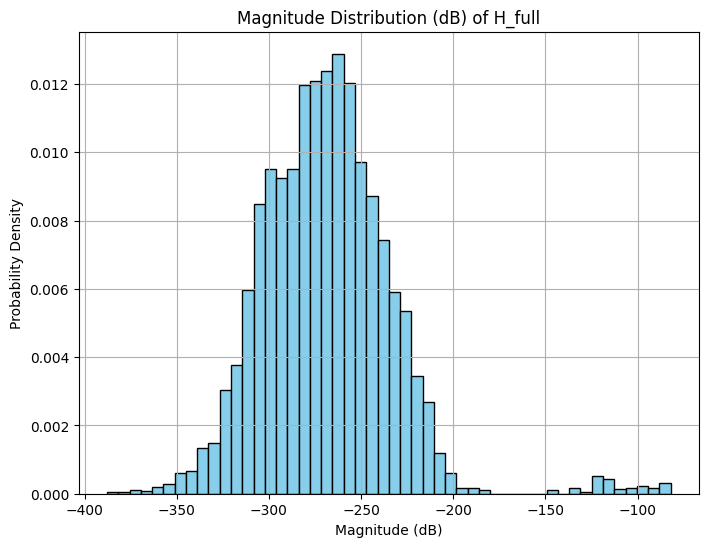

In [10]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the .mat file using loadmat (for older MAT formats)
data = sio.loadmat("../dataset/output/H_full.mat")
H_full = data['H_full']  # Expected shape: (16, 2, 500)
print("H_full shape:", H_full.shape)

# Flatten the channel matrix to 1D (all coefficients)
H_flat = H_full.flatten()

# Compute the magnitude and phase
magnitude = np.abs(H_flat)
phase = np.angle(H_flat)

# Convert magnitude to dB
# For example, 1e-15 becomes 20*log10(1e-15) = -300 dB,
# and 1e-14 becomes -280 dB.
mag_db = 20 * np.log10(magnitude)

# Plot the magnitude distribution in dB scale
plt.figure(figsize=(8, 6))
plt.hist(mag_db, bins=50, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Magnitude (dB)')
plt.ylabel('Probability Density')
plt.title('Magnitude Distribution (dB) of H_full')
plt.grid(True)
plt.show()

# # Plot the phase distribution (radians)
# plt.figure(figsize=(8, 6))
# plt.hist(phase, bins=50, density=True, color='lightgreen', edgecolor='black')
# plt.xlabel('Phase (radians)')
# plt.ylabel('Probability Density')
# plt.title('Phase Distribution of H_full')
# plt.grid(True)
# plt.show()


### Scenario 2

$$
\begin{aligned}
\textbf{Current Simulation Parameters:} \\[1ex]
\textbf{BS Antenna Configuration:} \\
&\quad \text{Array dimensions: } 4 \times 4 \quad (\text{Total elements: }16). \\
&\quad \text{Downtilt angle: } 30^\circ \quad (\textbf{was } 12^\circ \text{ previously}). \\
&\quad \text{Element spacing: } 0.5 \text{ (in wavelengths).} \\
&\quad \text{Element position offset: } 0.8\,\mathrm{m} \quad (\textbf{was } 0.5\,\mathrm{m} \text{ previously}). \\
&\quad \text{Additional pattern parameters: } 1,\; 2,\; 2.5,\; 2.5. \\[1ex]
\textbf{MT Antenna Configuration:} \\
&\quad \text{Type: Omnidirectional.} \\
&\quad \text{Number of elements: } 2 \quad (\text{via element copying}). \\
&\quad \text{Polarization: } F_a(:,:,2)=0,\; F_b(:,:,2)=1. \\[1ex]
\textbf{Simulation Parameters:} \\
&\quad \text{Number of mobile terminals: } 700 \quad (\textbf{was } 500 \text{ previously}). \\
&\quad \text{Center frequency: } 8\,\mathrm{GHz} \quad (\textbf{was } 6\,\mathrm{GHz}). \\
&\quad \text{Frequency count: } 1 \quad (\text{single-frequency simulation}). \\
&\quad \mathrm{use\_3GPP\_baseline} = 1 \quad (\text{enabled, disables spherical waves}). \\
&\quad \mathrm{show\_progress\_bars} = 1 \quad (\textbf{was } 0). \\[1ex]
\textbf{Layout Generation:} \\
&\quad \text{Inter-site distance (ISD): } 700\,\mathrm{m} \quad (\textbf{was } 500\,\mathrm{m}). \\
&\quad \text{BS height: } 20\,\mathrm{m} \quad (\textbf{was } 25\,\mathrm{m}). \\
&\quad \text{Scenario: } \mathtt{'3GPP\_38.901\_UMa'}. \\[1ex]
\textbf{User Dropping and Placement:} \\
&\quad \text{Minimum distance from BS (no\_go\_dist): } 40\,\mathrm{m} \quad (\textbf{was } 35\,\mathrm{m}). \\
&\quad \text{User distribution radius: Approximately } 0.93 \times \mathrm{ISD}. \\
&\quad \text{User height (set in rx\_position): } 2\,\mathrm{m} \quad (\textbf{was } 1.5\,\mathrm{m}). \\
&\quad \text{Indoor probability: } 80\% \quad (0.8). \\[1ex]
\textbf{Channel Generation:} \\
&\quad SC_\lambda = 0.4 \quad (\textbf{was } 0 \text{ in the previous version}). \\[1ex]
\textbf{Plotting:} \\
&\quad \text{Coupling loss histogram bins: } -210\,\mathrm{dB} \text{ to } -60\,\mathrm{dB} \quad (\text{step } 0.5\,\mathrm{dB}). \\
&\quad \text{Wide-band SINR histogram bins: } -10\,\mathrm{dB} \text{ to } 40\,\mathrm{dB} \quad (\text{step } 0.5\,\mathrm{dB}), \\
&\quad \quad \text{with the x-axis limited to } [-10,10]. \\
&\quad \text{Delay spread histogram bins: } 0 \text{ to } 500\,\mathrm{ns} \quad (\text{step } 5\,\mathrm{ns}). \\[1ex]
\textbf{Other:} \\
&\quad \text{Random seed is fixed with } \mathtt{rng(0)}.
\end{aligned}
$$


H_full shape: (12, 2, 700)


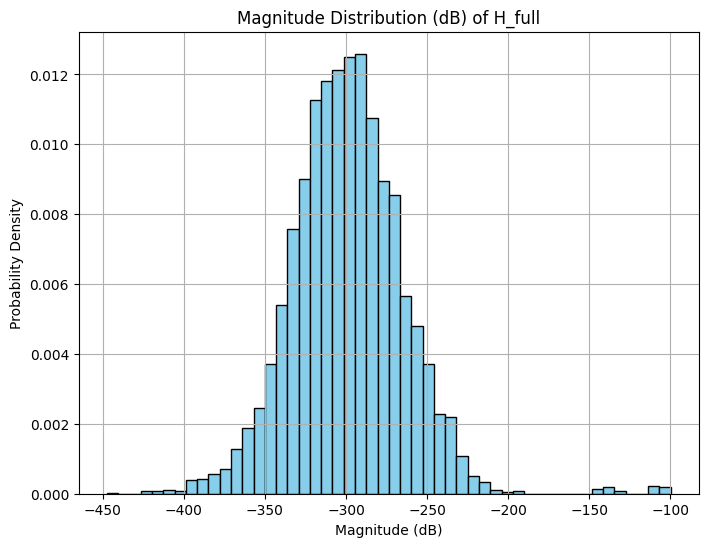

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load the .mat file using loadmat (for older MAT formats)
data = sio.loadmat("../dataset/output/H_full.mat")
H_full = data['H_full']  # Expected shape: (16, 2, 500)
print("H_full shape:", H_full.shape)

# Flatten the channel matrix to 1D (all coefficients)
H_flat = H_full.flatten()

# Compute the magnitude and phase
magnitude = np.abs(H_flat)
phase = np.angle(H_flat)

# Convert magnitude to dB
# For example, 1e-15 becomes 20*log10(1e-15) = -300 dB,
# and 1e-14 becomes -280 dB.
mag_db = 20 * np.log10(magnitude)

# Plot the magnitude distribution in dB scale
plt.figure(figsize=(8, 6))
plt.hist(mag_db, bins=50, density=True, color='skyblue', edgecolor='black')
plt.xlabel('Magnitude (dB)')
plt.ylabel('Probability Density')
plt.title('Magnitude Distribution (dB) of H_full')
plt.grid(True)
plt.show()

# # Plot the phase distribution (radians)
# plt.figure(figsize=(8, 6))
# plt.hist(phase, bins=50, density=True, color='lightgreen', edgecolor='black')
# plt.xlabel('Phase (radians)')
# plt.ylabel('Probability Density')
# plt.title('Phase Distribution of H_full')
# plt.grid(True)
# plt.show()


### Comparison

H_Scenario_1 shape: (12, 2, 500)
H_Scenario_2 shape: (12, 2, 700)


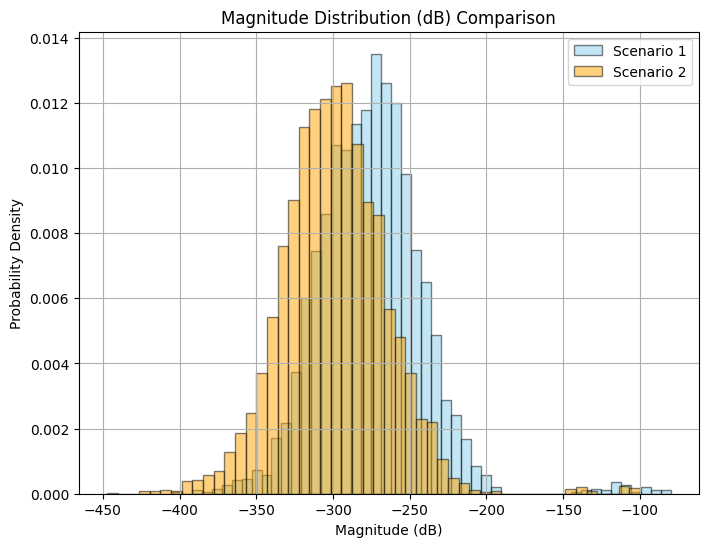

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

data1 = sio.loadmat("../dataset/output/H_scenario_1.mat")
H_full1 = data1['H_full']  # Expected shape: (16, 2, 500)
print("H_Scenario_1 shape:", H_full1.shape)

data2 = sio.loadmat("../dataset/output/H_scenario_2.mat")
H_full2 = data2['H_full']  # Expected shape: (16, 2, 500)
print("H_Scenario_2 shape:", H_full2.shape)

H_flat1 = H_full1.flatten()
H_flat2 = H_full2.flatten()
mag1 = np.abs(H_flat1)
mag_db1 = 20 * np.log10(mag1)

mag2 = np.abs(H_flat2)
mag_db2 = 20 * np.log10(mag2)

# Plot both distributions on the same graph
plt.figure(figsize=(8, 6))
plt.hist(mag_db1, bins=50, density=True, color='skyblue', alpha=0.5, edgecolor='black', label='Scenario 1')
plt.hist(mag_db2, bins=50, density=True, color='orange', alpha=0.5, edgecolor='black', label='Scenario 2')
plt.xlabel('Magnitude (dB)')
plt.ylabel('Probability Density')
plt.title('Magnitude Distribution (dB) Comparison')
plt.legend()
plt.grid(True)
plt.show()
